/var/folders/ly/_mtmq8551dg5lyzrtlyfh5g80000gn/T/ipykernel_40212/1192193324.py:22: RuntimeWarning: divide by zero encountered in log
  logerr = np.log(err)


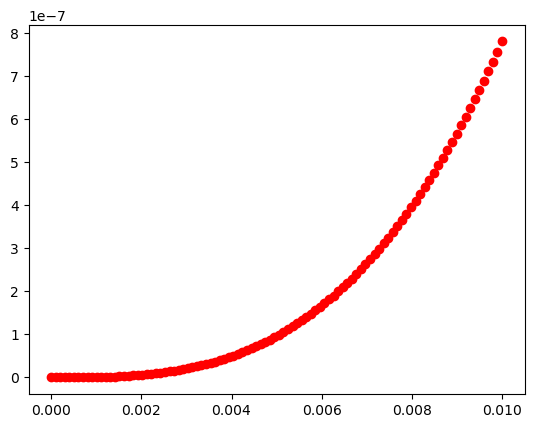

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.linalg as la

A = np.random.rand(4,4)
B = np.random.rand(4,4)

# Trotter-Suzuki approximation
dtau = np.linspace(0., 0.01, 100)
err_ = []
logerr_ = []

for t in dtau:
    # Exact Solution
    U = la.expm((A+B)*t)
    # Trotter-Suzuki approximation
    U1 = la.expm(A*t/2) @ la.expm(B*t) @ la.expm(A*t/2)
    # Error
    err = la.norm(U-U1)
    # Logarithmic error
    logerr = np.log(err)
    # Store
    err_.append(err)
    logerr_.append(logerr)

err_ = np.array(err_)
logerr_ = np.array(logerr_)
plt.plot(dtau, err_, 'ro')



/var/folders/ly/_mtmq8551dg5lyzrtlyfh5g80000gn/T/ipykernel_40212/2574287522.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(dtau), logerr_, 'bo')


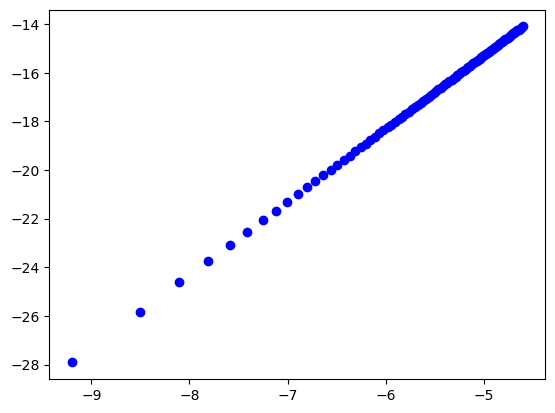

In [6]:
plt.plot(np.log(dtau), logerr_, 'bo')

2.000959204184643 0.350429077045078 0.999999991008356 0.0 8.493907273898282e-06


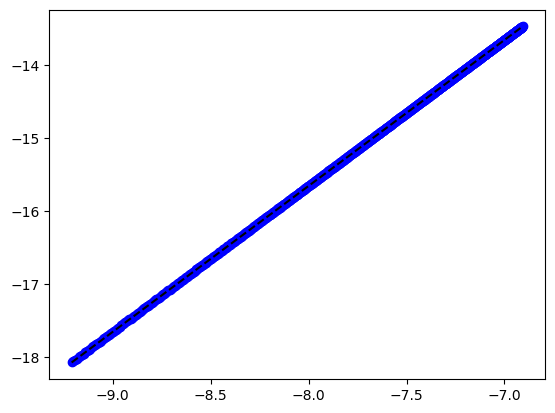

In [23]:
A = np.random.rand(4,4)
B = np.random.rand(4,4)
C = np.random.rand(4,4)

# 3 components Trotter-Suzuki approximation
dtau = np.linspace(0.0001, 0.001, 1000)
err_ = []
logerr_ = []

for t in dtau:
    # Exact Solution
    U = la.expm((A+B+C)*t)
    # Trotter-Suzuki approximation
    U1 = la.expm(C*t) @ la.expm(A*t/2) @ la.expm(B*t) @ la.expm(A*t/2)
    # Error
    err = la.norm(U-U1)
    # Logarithmic error
    logerr = np.log(err)
    # Store
    err_.append(err)
    logerr_.append(logerr)

err_ = np.array(err_)
logerr_ = np.array(logerr_)

plt.plot(np.log(dtau), logerr_, 'bo')

slope, intercept, r, p, se = stats.linregress(np.log(dtau),logerr_)
print(slope, intercept, r, p, se)
plt.plot(np.log(dtau), slope*np.log(dtau)+intercept, 'k--')
